In [69]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [70]:
init_data = pd.read_csv('C:/Users/iDIGITAL/Desktop/Gt Challege/wfpdisrel/#task4-eda/datasets/OUTPUT_WBI_exposer_cyclones_v14.csv', sep=';')

In [71]:
init_data.head()

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,194046
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,642117
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,20200
3,1951337N09150,AMY,PHL,1951,"[(12.0725, 130.967), (12.1333, 130.517), (12.1...","[(11.7833, 127.9)]","[(10.7333, 124.8), (10.534, 123.174), (10.6833...",WP,WP,12,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,4.760039e+06,3.006670e+06,1.114774e+06,60000
4,1952180N05144,EMMA,PHL,1952,"[(9.33776, 130.185), (9.38633, 129.61), (9.45,...","[(9.45, 129.017), (9.50407, 128.407), (9.56613...","[(10.4667, 123.867), (10.6492, 123.239), (10.8...",WP,WP,7,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,5.130796e+06,2.789486e+06,1.988524e+06,103


In [72]:
init_data['TOTAL_AFFECTED_ex_1'] = pd.qcut(init_data['TOTAL_AFFECTED'], q=2)

In [73]:
test = list(init_data['TOTAL_AFFECTED_ex_1'].unique())

In [74]:
test

[Interval(30000.0, 29622000.0, closed='right'),
 Interval(1.999, 30000.0, closed='right')]

In [75]:
init_data['output_class'] = init_data.apply(lambda x: 0 if x['TOTAL_AFFECTED_ex_1'] == test[1] else 1,
                                            axis=1)

In [76]:
# Correlations of numerical values
init_data.corr(method="spearman")['TOTAL_AFFECTED'].sort_values()

HDI                                                  -0.230851
GDP per capita (constant 2010 US$)                   -0.225501
MIN_DIST2LAND                                        -0.182799
Life expectancy at birth, total (years)              -0.151350
Adjusted savings: education expenditure (% of GNI)   -0.145880
MIN_PRES                                             -0.142759
MAX_STORMSPEED                                       -0.071916
Cereal yield (kg per hectare)                        -0.062473
POP_DEN_SQ_KM                                         0.014541
YEAR                                                  0.028391
Food production index (2004-2006 = 100)               0.033942
DISTANCE_TRACK                                        0.040707
Arable land (hectares per person)                     0.047042
34KN_ASSETS                                           0.058882
TOTAL_HOURS_EVENT                                     0.058962
DISTANCE_TRACK_VINCENTY                               0

In [77]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 53 columns):
SID                                                   991 non-null object
NAME                                                  991 non-null object
ISO                                                   991 non-null object
YEAR                                                  991 non-null int64
COORDS                                                991 non-null object
COORDS_MAX_WINDS                                      991 non-null object
COORDS_MIN_DIST2LAND                                  991 non-null object
BASIN                                                 991 non-null object
SUB BASIN                                             991 non-null object
MONTH_START                                           991 non-null int64
MONTH_END                                             991 non-null int64
DATE_START                                            991 non-null object
DATE_END  

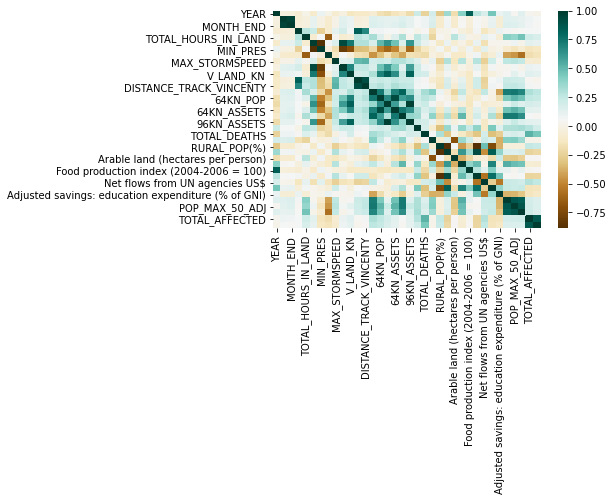

In [78]:
## Numerical Features
## Performing the correlation for all the features
spearman_corr = init_data.corr(method='spearman')
sns.heatmap(spearman_corr, cmap="BrBG")

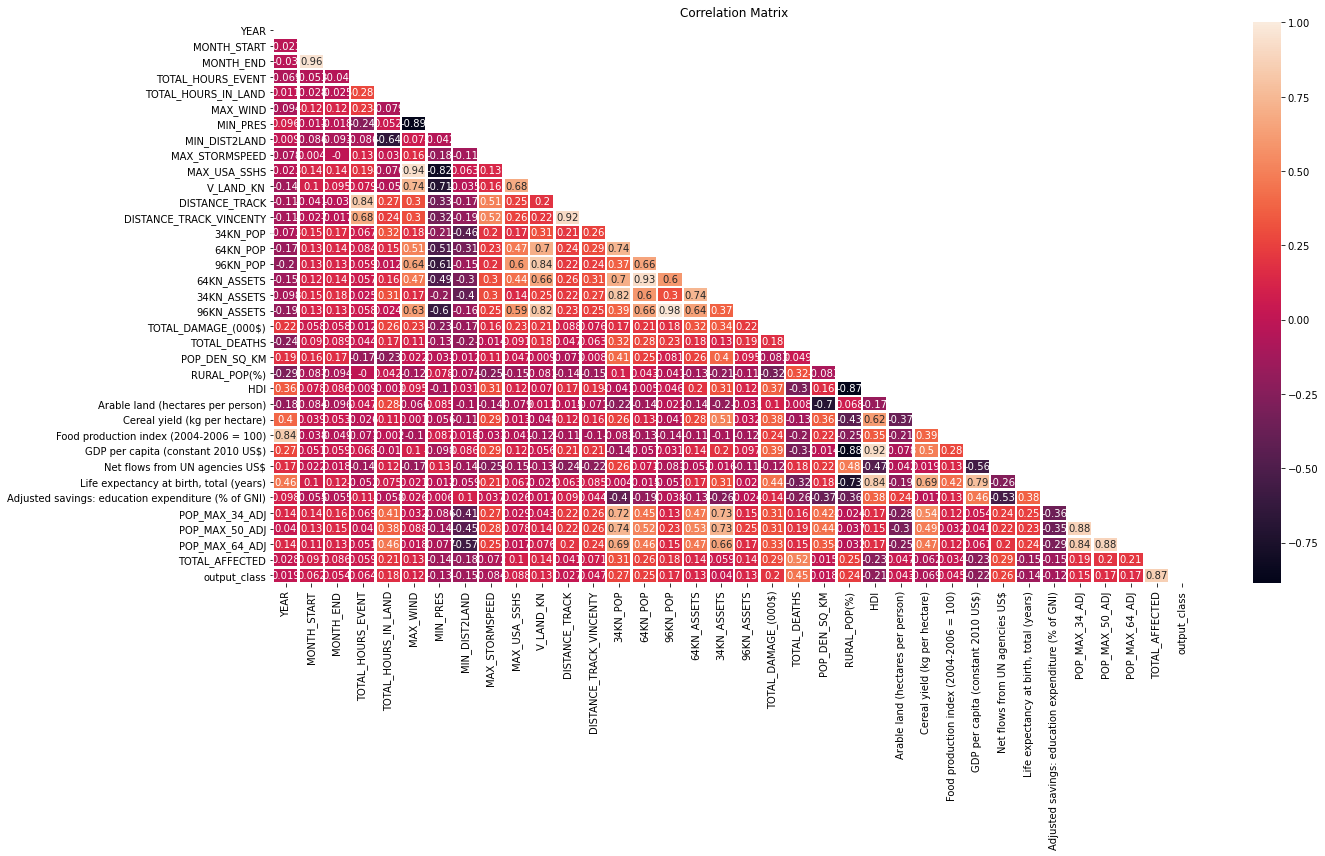

In [79]:
## Copied from Dev's Implementation for a better plot
plt.figure(figsize = (20, 12))
mask = np.triu(np.ones_like(init_data.corr(method = 'spearman'), dtype=bool))
sns.heatmap(round(init_data.corr(method = 'spearman'), 3), mask=mask, annot=True, linewidths=1.5)
plt.title('Correlation Matrix')
plt.tight_layout()
# plt.savefig('plots/cormat.png')
plt.show()

In [80]:
## Checking the skewness of the dataset
init_data.describe()

,YEAR,MONTH_START,MONTH_END,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED,output_class
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,989.000000,991.000000,...,987.000000,982.000000,9.910000e+02,987.000000,981.000000,9.110000e+02,9.110000e+02,9.110000e+02,9.910000e+02,991.000000
mean,1999.789102,7.770938,7.833502,89.267238,20.097713,86.881699,939.110999,16.533804,18.303832,1.776993,...,93.329764,9911.140931,2.150700e+07,70.304835,3.248915,2.770093e+07,1.504009e+07,5.948569e+06,5.816176e+05,0.488396
std,14.508337,2.766138,2.781165,73.284572,35.257498,33.635653,137.722579,40.005664,9.563449,1.913196,...,29.318225,15185.727417,2.667692e+07,7.495767,1.864046,4.367805e+07,2.775383e+07,1.159195e+07,2.004164e+06,0.500118
min,1949.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,...,13.360000,141.276363,-2.000000e+04,41.762000,0.538881,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000
25%,1991.000000,7.000000,7.000000,33.000000,0.000000,60.000000,937.000000,0.000000,13.000000,0.000000,...,76.160000,1412.947077,1.030000e+06,66.511671,1.840000,3.072560e+06,1.057294e+06,2.767477e+05,3.038000e+03,0.000000
50%,2004.000000,8.000000,9.000000,75.000000,6.000000,85.000000,960.000000,0.000000,16.000000,1.000000,...,98.770000,2605.425404,1.231000e+07,70.802000,2.800000,1.099835e+07,4.367111e+06,1.566158e+06,3.000000e+04,0.000000
75%,2011.000000,10.000000,10.000000,123.000000,24.000000,115.000000,980.000000,0.000000,21.000000,4.000000,...,113.950000,8918.568543,3.145000e+07,75.087500,4.297143,3.286035e+07,1.691340e+07,5.752552e+06,2.460315e+05,1.000000
max,2019.000000,12.000000,12.000000,516.000000,333.000000,185.000000,1013.000000,199.000000,69.000000,5.000000,...,202.377089,86150.462210,1.837500e+08,84.099756,14.010000,3.764972e+08,3.222762e+08,1.073686e+08,2.962200e+07,1.000000


In [81]:
spearman_corr['TOTAL_AFFECTED'].sort_values(ascending = False)

TOTAL_AFFECTED                                        1.000000
output_class                                          0.865800
TOTAL_DEATHS                                          0.521623
34KN_POP                                              0.313103
Net flows from UN agencies US$                        0.295261
TOTAL_DAMAGE_(000$)                                   0.287962
64KN_POP                                              0.260846
RURAL_POP(%)                                          0.249751
POP_MAX_64_ADJ                                        0.212022
TOTAL_HOURS_IN_LAND                                   0.209744
POP_MAX_50_ADJ                                        0.201107
POP_MAX_34_ADJ                                        0.188636
96KN_POP                                              0.184835
V_LAND_KN                                             0.143085
64KN_ASSETS                                           0.137412
96KN_ASSETS                                           0

In [82]:
# Selecting features 
num_features = ['output_class','TOTAL_HOURS_IN_LAND', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'V_LAND_KN','RURAL_POP(%)', 'HDI', 'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$','Adjusted savings: education expenditure (% of GNI)', 'TOTAL_AFFECTED']
cat_features = ['GENERAL_CATEGORY', 'MONTH_END','BASIN', 'SUB BASIN', 'NATURE', 'Income_level_Final']
data1 = init_data[num_features + cat_features]

In [88]:
Columns = data1.columns.to_list()

In [89]:
### impute the values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
### find missing columns based on the features selected
for cols in Columns:
    data1[cols] = impute.fit_transform(data1[[cols]])    

In [90]:
data1['MONTH_END'] = data1['MONTH_END'].apply(lambda x:str(x))

In [91]:
data1 = pd.concat([pd.get_dummies(data1[cat_features]), data1],axis=1)
data1 = data1.dropna()

In [92]:
### select requried columns and divide x and y
X = data1.drop(['TOTAL_AFFECTED','output_class'],axis=1)
y = data1['output_class']

In [93]:
### preform stratifiedshuffle split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data1, data1['GENERAL_CATEGORY']):
    train_x, test_x = X.iloc[train_index], X.iloc[test_index]
    train_y, test_y = y.iloc[train_index], y.iloc[test_index]

In [94]:
## drop the non numerical columns
train_x.drop(columns = cat_features, axis=1, inplace=True)
test_x.drop(columns= cat_features, axis=1, inplace=True)

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
numerical_columns =['TOTAL_HOURS_IN_LAND',
       'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'V_LAND_KN', 'RURAL_POP(%)',
       'HDI', 'GDP per capita (constant 2010 US$)',
       'Net flows from UN agencies US$',
       'Adjusted savings: education expenditure (% of GNI)']

In [96]:
## perform standard scaler
#select the numerical columsn
ss_scaler = StandardScaler()
for col in numerical_columns:
    train_x[col] = ss_scaler.fit_transform(train_x[[col]])
    test_x[col] = ss_scaler.transform(test_x[[col]])

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [98]:
## using grid search
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},

In [99]:
svm = SVC()
grid_search_svm = GridSearchCV(svm, svm_param, n_jobs=-1, verbose=2)

In [100]:
grid_search_svm.fit(train_x, train_y)
grid_search_svm.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.3min finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.5,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
y_pred = grid_search_svm.predict(test_x)

In [102]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [103]:
roc_auc_score(y_pred, test_y)

0.6563315586178098

In [104]:
X_manual = data1.drop('TOTAL_AFFECTED',axis=1)
y_manual = data1['TOTAL_AFFECTED']

In [105]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data1, data1['GENERAL_CATEGORY']):
    train_x_man, test_x_man = X_manual.iloc[train_index], X_manual.iloc[test_index]
    train_y_man, test_y_man = y_manual.iloc[train_index], y_manual.iloc[test_index]

In [106]:
train_x_man.drop(columns = cat_features, axis=1, inplace=True)
test_x_man.drop(columns= cat_features, axis=1, inplace=True)

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man['MIN_PRES'] = train_x_man['MIN_PRES'].astype('float64')
test_x_man['MIN_PRES'] = test_x_man['MIN_PRES'].astype('float64')

train_x_man['MIN_DIST2LAND'] = train_x_man['MIN_DIST2LAND'].astype('float64')
test_x_man['MIN_DIST2LAND'] = test_x_man['MIN_DIST2LAND'].astype('float64')

cols_man = train_x_man.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man:
    train_x_man[col] = ss1_scaler.fit_transform(train_x_man[[col]])
    test_x_man[col] = ss1_scaler.transform(test_x_man[[col]])

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.p

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [109]:
train_x_man.output_class

223    0
192    1
779    1
471    0
321    1
      ..
437    1
752    1
864    1
610    1
940    0
Name: output_class, Length: 781, dtype: int64

In [110]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [111]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [112]:
## training initially on manual selection
grid_search_svr.fit(train_x_man, train_y_man)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
grid_search_svr.best_estimator_

SVR(C=1, cache_size=200, coef0=10, degree=8, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [114]:
y_pred_man_svr = grid_search_svr.predict(test_x_man)

In [116]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr, test_y_man)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr, test_y_man)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr, test_y_man))}')

mean absolute error : 678496.2950939575
mean squared error : 4785324672988.613
root mean squared error : 2187538.496344376


# Less effected

In [117]:
data2 = data1[data1['output_class']==0]
data2

,GENERAL_CATEGORY_Cat 1,GENERAL_CATEGORY_Cat 2,GENERAL_CATEGORY_Cat 3,GENERAL_CATEGORY_Cat 4,GENERAL_CATEGORY_Cat 5,GENERAL_CATEGORY_TD,GENERAL_CATEGORY_TS,MONTH_END_1,MONTH_END_10,MONTH_END_11,...,GDP per capita (constant 2010 US$),Net flows from UN agencies US$,Adjusted savings: education expenditure (% of GNI),TOTAL_AFFECTED,GENERAL_CATEGORY,MONTH_END,BASIN,SUB BASIN,NATURE,Income_level_Final
2,0,0,1,0,0,0,0,0,0,0,...,3796.219401,0.000000e+00,2.578304,20200,Cat 3,8,NAm,CS,TS,Low
4,0,0,1,0,0,0,0,0,0,0,...,1059.467412,0.000000e+00,2.757732,103,Cat 3,7,WP,WP,TS,Low_Middle
6,0,0,1,0,0,0,0,0,0,0,...,3907.493801,0.000000e+00,3.003239,11432,Cat 3,9,NAm,GM,TS,Low
7,0,1,0,0,0,0,0,0,0,0,...,192.285058,0.000000e+00,1.610277,111,Cat 2,9,WP,WP,TS,Low
9,0,1,0,0,0,0,0,0,0,0,...,192.285058,0.000000e+00,1.610277,15127,Cat 2,6,WP,WP,TS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0,1,0,0,0,0,0,0,1,0,...,667.945437,1.813728e+07,3.600000,15124,Cat 2,10,NI,AS,NR,Low
980,0,0,0,0,1,0,0,0,1,0,...,10403.540400,1.027804e+07,5.194005,10000,Cat 5,10,EP,EP,TS,High_Middle
983,0,0,0,0,0,1,0,0,0,1,...,1964.475991,2.431523e+07,4.603050,10028,TD,11,WP,WP,NR,Low_Middle
984,0,0,0,0,0,0,1,0,0,0,...,2100.800780,1.019945e+08,3.080000,10000,TS,12,NI,BB,NR,Low_Middle


In [118]:
data2.output_class

2      0
4      0
6      0
7      0
9      0
      ..
978    0
980    0
983    0
984    0
987    0
Name: output_class, Length: 497, dtype: int64

In [122]:
X_manual_0 = data2.drop('TOTAL_AFFECTED',axis=1)
y_manual_0 = data2['TOTAL_AFFECTED']

In [123]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data2, data2['GENERAL_CATEGORY']):
    train_x_man_0, test_x_man_0 = X_manual_0.iloc[train_index], X_manual_0.iloc[test_index]
    train_y_man_0, test_y_man_0 = y_manual_0.iloc[train_index], y_manual_0.iloc[test_index]

In [124]:
train_x_man_0.drop(columns = cat_features, axis=1, inplace=True)
test_x_man_0.drop(columns= cat_features, axis=1, inplace=True)

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man_0['MIN_PRES'] = train_x_man_0['MIN_PRES'].astype('float64')
test_x_man_0['MIN_PRES'] = test_x_man_0['MIN_PRES'].astype('float64')

train_x_man_0['MIN_DIST2LAND'] = train_x_man_0['MIN_DIST2LAND'].astype('float64')
test_x_man_0['MIN_DIST2LAND'] = test_x_man_0['MIN_DIST2LAND'].astype('float64')

cols_man_0 = train_x_man_0.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man_0:
    train_x_man_0[col] = ss1_scaler.fit_transform(train_x_man_0[[col]])
    test_x_man_0[col] = ss1_scaler.transform(test_x_man_0[[col]])

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.p

In [126]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [127]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [128]:
## training initially on manual selection
grid_search_svr.fit(train_x_man_0, train_y_man_0)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [129]:
y_pred_man_svr_0 = grid_search_svr.predict(test_x_man_0)

In [131]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr_0, test_y_man_0)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr_0, test_y_man_0)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr_0, test_y_man_0))}')

mean absolute error : 6119.557961392866
mean squared error : 83462244.42591587
root mean squared error : 9135.767314567282


# Highly Effected 

In [133]:
data3 = data1[data1['output_class']==1]
data3

,GENERAL_CATEGORY_Cat 1,GENERAL_CATEGORY_Cat 2,GENERAL_CATEGORY_Cat 3,GENERAL_CATEGORY_Cat 4,GENERAL_CATEGORY_Cat 5,GENERAL_CATEGORY_TD,GENERAL_CATEGORY_TS,MONTH_END_1,MONTH_END_10,MONTH_END_11,...,GDP per capita (constant 2010 US$),Net flows from UN agencies US$,Adjusted savings: education expenditure (% of GNI),TOTAL_AFFECTED,GENERAL_CATEGORY,MONTH_END,BASIN,SUB BASIN,NATURE,Income_level_Final
0,0,0,0,1,0,0,0,0,0,0,...,8607.657082,0.0,2.867878,194046,Cat 4,6,WP,WP,TS,Low
1,0,0,0,1,0,0,0,0,0,0,...,8607.657082,0.0,2.867878,642117,Cat 4,9,WP,WP,ET,Low
3,0,0,0,1,0,0,0,0,0,0,...,1059.467412,0.0,2.757732,60000,Cat 4,12,WP,WP,TS,Low_Middle
5,0,0,1,0,0,0,0,0,1,0,...,993.246656,0.0,1.284442,250000,Cat 3,10,NAm,CS,TS,Low_Middle
8,0,0,0,0,1,0,0,0,0,0,...,8607.657082,0.0,2.867878,1500000,Cat 5,9,WP,WP,TS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,0,0,0,0,0,1,1,0,0,...,6020.836485,0.0,4.188538,720885,TS,1,NI,BB,NR,High_Middle
986,0,0,1,0,0,0,0,0,0,0,...,585.650609,0.0,5.380000,1501500,Cat 3,3,SI,SI,NR,Low
988,0,0,0,1,0,0,0,0,0,0,...,1375.714129,0.0,4.326607,345311,Cat 4,4,SI,SI,NR,Low_Middle
989,0,0,0,1,0,0,0,0,0,0,...,585.650609,0.0,5.380000,400094,Cat 4,4,SI,SI,NR,Low


In [134]:
data3.output_class

0      1
1      1
3      1
5      1
8      1
      ..
985    1
986    1
988    1
989    1
990    1
Name: output_class, Length: 480, dtype: int64

In [135]:
X_manual_1 = data3.drop('TOTAL_AFFECTED',axis=1)
y_manual_1 = data3['TOTAL_AFFECTED']

In [136]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data3, data3['GENERAL_CATEGORY']):
    train_x_man_1, test_x_man_1 = X_manual_1.iloc[train_index], X_manual_1.iloc[test_index]
    train_y_man_1, test_y_man_1 = y_manual_1.iloc[train_index], y_manual_1.iloc[test_index]

In [137]:
train_x_man_1.drop(columns = cat_features, axis=1, inplace=True)
test_x_man_1.drop(columns= cat_features, axis=1, inplace=True)

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [138]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man_1['MIN_PRES'] = train_x_man_1['MIN_PRES'].astype('float64')
test_x_man_1['MIN_PRES'] = test_x_man_1['MIN_PRES'].astype('float64')

train_x_man_1['MIN_DIST2LAND'] = train_x_man_1['MIN_DIST2LAND'].astype('float64')
test_x_man_1['MIN_DIST2LAND'] = test_x_man_1['MIN_DIST2LAND'].astype('float64')

cols_man_1 = train_x_man_1.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man_1:
    train_x_man_1[col] = ss1_scaler.fit_transform(train_x_man_1[[col]])
    test_x_man_1[col] = ss1_scaler.transform(test_x_man_1[[col]])

c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\idigital\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.p

In [139]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [140]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [141]:
## training initially on manual selection
grid_search_svr.fit(train_x_man_1, train_y_man_1)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [142]:
y_pred_man_svr_1 = grid_search_svr.predict(test_x_man_1)

In [143]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr_1, test_y_man_1)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr_1, test_y_man_1)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr_1, test_y_man_1))}')

mean absolute error : 1098266.5895510952
mean squared error : 6456389675902.008
root mean squared error : 2540942.674658759


In [156]:
data1['TOTAL_AFFECTED_ex_5'] = pd.qcut(init_data['TOTAL_AFFECTED'], q=15)

In [157]:
data1['TOTAL_AFFECTED_ex_5'].value_counts()

(1.999, 200.0]             71
(7030.0, 12000.0]          68
(107650.0, 200000.0]       67
(37770.0, 60000.0]         67
(2100439.0, 29622000.0]    66
(800200.0, 2100439.0]      66
(21656.0, 37770.0]         66
(390150.0, 800200.0]       65
(1700.0, 3710.0]           65
(200000.0, 390150.0]       64
(3710.0, 7030.0]           64
(750.0, 1700.0]            64
(60000.0, 107650.0]        63
(12000.0, 21656.0]         63
(200.0, 750.0]             58
Name: TOTAL_AFFECTED_ex_5, dtype: int64